In [2]:
import pandas as pd

file_path = "D:/Sonu/Excelerate/Marketing Team Data.csv"

df = pd.read_csv(file_path)
df.head()


,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09


In [22]:
# Group by 'Campaign ID' and sum the 'Reach' and 'Impression' columns
combined_reach_impression_df = df.groupby('campaign ID').agg({'Reach': 'sum', 'Impressions': 'sum'}).sort_values(["Reach"]).reset_index()
combined_reach_impression_df

,campaign ID,Reach,Impressions
0,Campaign 11,2555,2900
1,Campaign 3,3187,3572
2,Campaign 4,3307,4267
3,Campaign 10,3636,4091
4,Campaign 9,7333,8660
5,Campaign 5,15024,20483
6,Campaign 8,21929,28974
7,Campaign 1,23904,47139
8,Campaign 7,29668,65215
9,Campaign 6,31831,37246


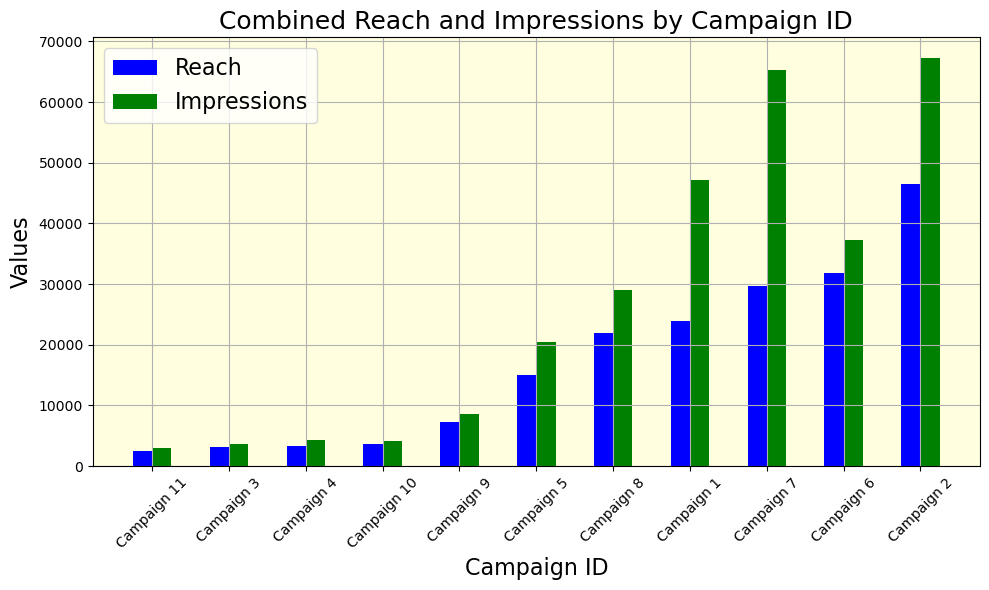

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightyellow')

bar_width = 0.25
index = np.arange(len(combined_reach_impression_df['campaign ID']))

# Plot Reach bars
bar1 = ax.bar(index, combined_reach_impression_df['Reach'], bar_width, label='Reach', color='blue')

# Plot Impressions bars
bar2 = ax.bar(index + bar_width, combined_reach_impression_df['Impressions'], bar_width, label='Impressions', color='green')

# Add labels, title, and legend
ax.set_xlabel('Campaign ID', fontsize='16')
ax.set_ylabel('Values', fontsize='16')
ax.set_title('Combined Reach and Impressions by Campaign ID', fontsize='18')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_reach_impression_df['campaign ID'], rotation=45)
ax.legend(fontsize='16')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Group by 'Campaign ID' and 'Age', and sum the 'Reach' column
grouped_df = df.groupby(['campaign ID', 'Age'])['Reach'].sum().unstack().fillna(0)
grouped_df


Age,13-17,18-24,25-34,35-44,45-54,55-64
campaign ID,,,,,,
Campaign 1,0.0,0.0,11387.0,8761.0,2867.0,889.0
Campaign 10,2557.0,741.0,338.0,0.0,0.0,0.0
Campaign 11,2159.0,305.0,91.0,0.0,0.0,0.0
Campaign 2,14753.0,29675.0,2066.0,0.0,0.0,0.0
Campaign 3,2271.0,704.0,212.0,0.0,0.0,0.0
Campaign 4,2330.0,759.0,218.0,0.0,0.0,0.0
Campaign 5,5355.0,5952.0,3717.0,0.0,0.0,0.0
Campaign 6,0.0,30110.0,1721.0,0.0,0.0,0.0
Campaign 7,6145.0,18900.0,4623.0,0.0,0.0,0.0


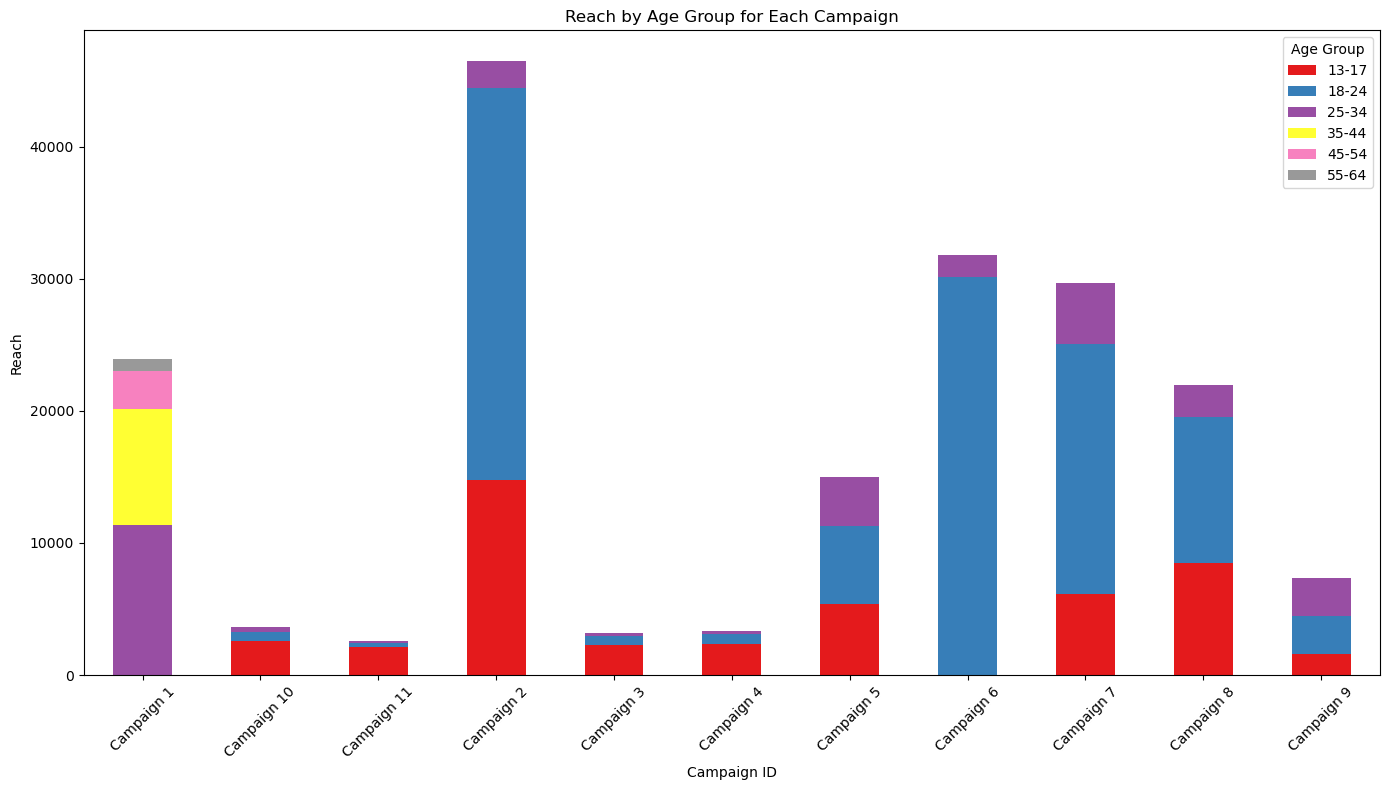

In [10]:
# Create a stacked bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set1')

# Add labels, title, and legend
plt.xlabel('Campaign ID')
plt.ylabel('Reach')
plt.title('Reach by Age Group for Each Campaign')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()

plt.show()

In [47]:
# Group by 'Campaign ID' and sum the 'Reach' and 'Amount Spent in INR' columns
campaign_cost_reach_df = df.groupby('campaign ID').agg({'Reach': 'sum', 'Amount Spent in INR': 'sum'}).reset_index()

# Calculate the cost per reach for each campaign
campaign_cost_reach_df['Cost Per Reach'] = campaign_cost_reach_df['Amount Spent in INR'] / campaign_cost_reach_df['Reach']

# Sort the DataFrame by 'Cost Per Reach' in descending order
sorted_campaign_df = campaign_cost_reach_df.sort_values(by='Cost Per Reach', ascending=False)

sorted_campaign_df

,campaign ID,Reach,Amount Spent in INR,Cost per Result (CPR)
3,Campaign 2,46494,1579.02,3.10
7,Campaign 6,31831,955.21,2.11
8,Campaign 7,29668,1035.24,5.99
0,Campaign 1,23904,2333.33,20.52
9,Campaign 8,21929,942.78,2.69
6,Campaign 5,15024,837.78,11.91
10,Campaign 9,7333,876.26,28.05
1,Campaign 10,3636,856.67,55.95
5,Campaign 4,3307,923.96,23.79
4,Campaign 3,3187,850.68,69.32


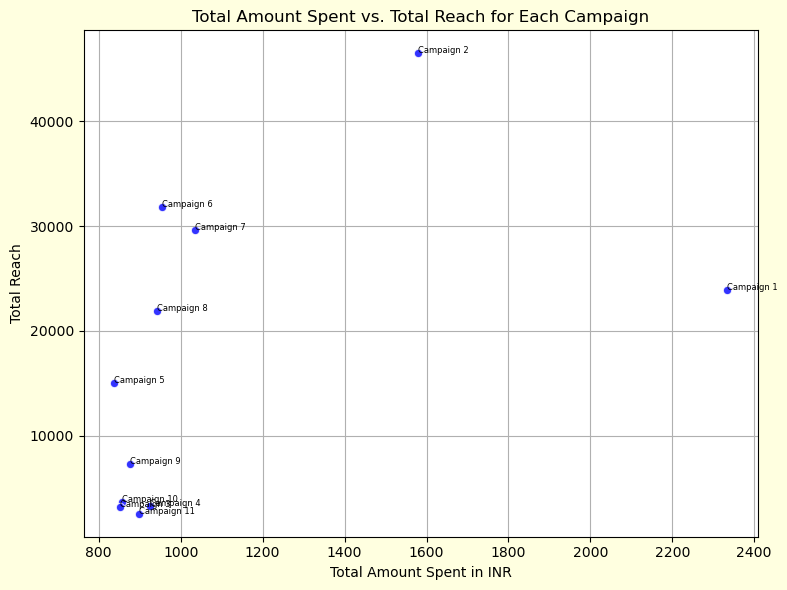

In [48]:
import seaborn as sns

# Create a scatter plot for total cost vs. reach
plt.figure(figsize=(8, 6), facecolor='lightyellow')
plt.scatter(sorted_campaign_df['Amount Spent in INR'], sorted_campaign_df['Reach'], color='blue', alpha=0.8, edgecolors='w', linewidth=0.8)

# Add labels and title
plt.xlabel('Total Amount Spent in INR')
plt.ylabel('Total Reach')
plt.title('Total Amount Spent vs. Total Reach for Each Campaign')

# Annotate the points with campaign IDs
for i, row in sorted_campaign_df.iterrows():
    plt.annotate(row['campaign ID'], (row['Amount Spent in INR'], row['Reach']), fontsize=6)
    
# sns.regplot(data=sorted_campaign_df, x='Amount Spent in INR', y='Reach', 
#             scatter=False, ci=None, color='lightgreen')

plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Select the relevant columns: 'Campaign ID' and 'Cost per Result (CPR)'
cpr_df = df[['campaign ID', 'Cost per Result (CPR)']]

# Group by 'Campaign ID' and calculate the average CPR if there are multiple rows per campaign
sum_cpr_df = cpr_df.groupby('campaign ID')['Cost per Result (CPR)'].sum().sort_values(ascending=False).reset_index()

sum_cpr_df

,campaign ID,Cost per Result (CPR)
0,Campaign 3,69.32
1,Campaign 10,55.95
2,Campaign 11,28.71
3,Campaign 9,28.05
4,Campaign 4,23.79
5,Campaign 1,20.52
6,Campaign 5,11.91
7,Campaign 7,5.99
8,Campaign 2,3.10
9,Campaign 8,2.69


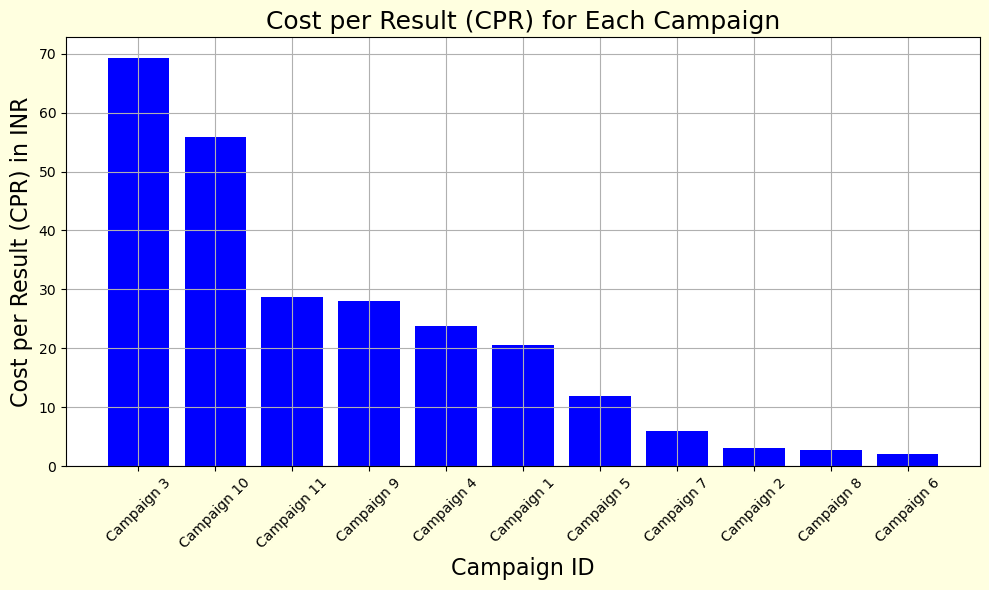

In [90]:
plt.figure(figsize=(10, 6), facecolor='lightyellow')
plt.bar(sum_cpr_df['campaign ID'], sum_cpr_df['Cost per Result (CPR)'], color='blue')

# Add labels and title
plt.xlabel('Campaign ID', fontsize='16')
plt.ylabel('Cost per Result (CPR) in INR', fontsize='16')
plt.title('Cost per Result (CPR) for Each Campaign', fontsize='18')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [81]:
# Select the relevant columns: 'Campaign ID' and 'Click-Through Rate (CTR)'
ctr_df = df[['campaign ID', 'Click-Through Rate (CTR)']]

# Group by 'Campaign ID' and calculate the average CPC if there are multiple rows per campaign
average_ctr_df = cpr_df.groupby('campaign ID')['Click-Through Rate (CTR)'].sum().sort_values(ascending=False).reset_index()

average_ctr_df

,campaign ID,Click-Through Rate (CTR)
0,Campaign 8,29.556387
1,Campaign 11,26.801233
2,Campaign 2,17.787891
3,Campaign 4,16.540385
4,Campaign 3,13.061608
5,Campaign 1,10.921752
6,Campaign 10,10.875937
7,Campaign 5,10.091072
8,Campaign 6,8.607125
9,Campaign 9,7.943310


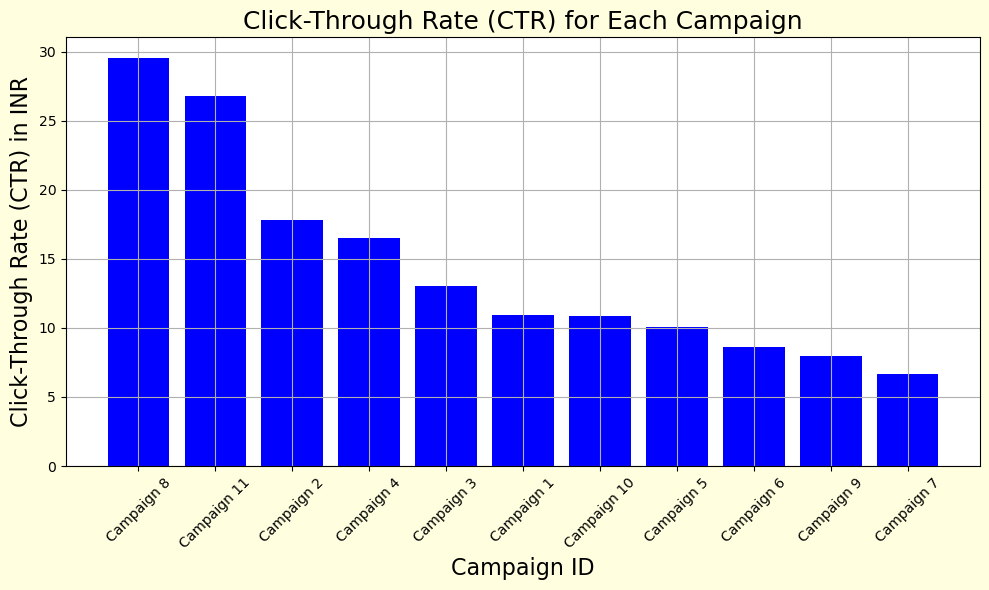

In [82]:
plt.figure(figsize=(10, 6), facecolor='lightyellow')
plt.bar(average_ctr_df['campaign ID'], average_ctr_df['Click-Through Rate (CTR)'], color='blue')

# Add labels and title
plt.xlabel('Campaign ID', fontsize='16')
plt.ylabel('Click-Through Rate (CTR) in INR', fontsize='16')
plt.title('Click-Through Rate (CTR) for Each Campaign', fontsize='18')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

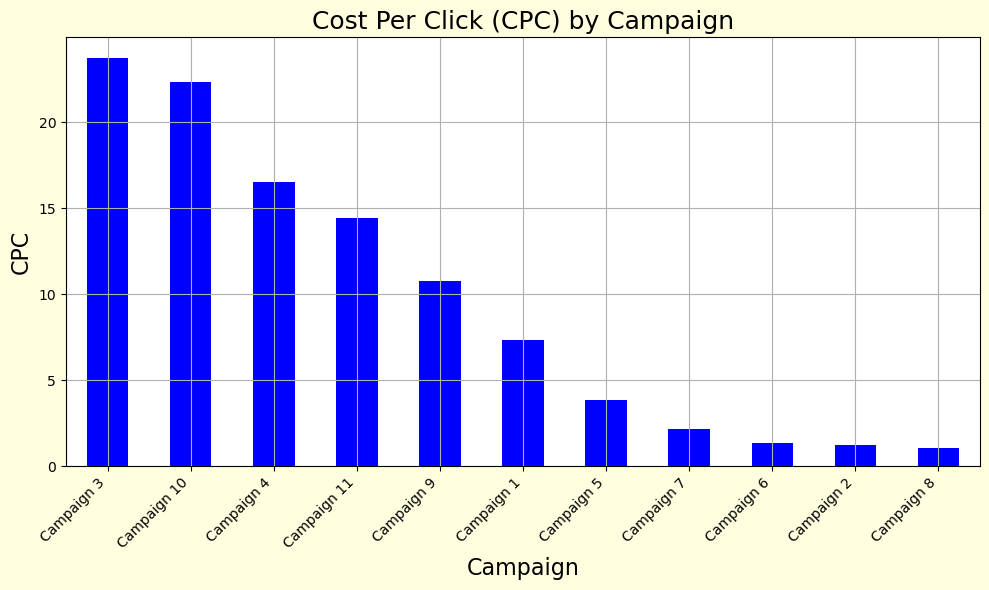

In [80]:
plt.figure(figsize=(10, 6), facecolor='lightyellow')
avg_ctc = df.groupby('campaign ID')['Cost Per Click (CPC)'].sum().sort_values(ascending=False)
avg_ctc.plot(kind='bar', color='blue')
plt.title('Cost Per Click (CPC) by Campaign', fontsize='18')
plt.xlabel('Campaign', fontsize='16')
plt.ylabel('CPC', fontsize='16')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [37]:
combined_reach_amountspend_df = df.groupby('campaign ID').agg({'Reach': 'sum', 'Amount Spent in INR': 'sum'}).sort_values(["Amount Spent in INR"]).reset_index()
combined_reach_amountspend_df


,campaign ID,Reach,Amount Spent in INR
0,Campaign 5,15024,837.78
1,Campaign 3,3187,850.68
2,Campaign 10,3636,856.67
3,Campaign 9,7333,876.26
4,Campaign 11,2555,897.68
5,Campaign 4,3307,923.96
6,Campaign 8,21929,942.78
7,Campaign 6,31831,955.21
8,Campaign 7,29668,1035.24
9,Campaign 2,46494,1579.02


In [22]:
df.columns


Index(['campaign ID', 'Campaign Name', 'Audience', 'Age', 'Geography', 'Reach',
       'Impressions', 'Frequency', 'Clicks', 'Unique Clicks',
       'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR)',
       'Unique Click-Through Rate (Unique CTR)', 'Amount Spent in INR',
       'Cost Per Click (CPC)', 'Cost per Result (CPR)'],
      dtype='object')

In [35]:
combined_impression_amountspend_df = df.groupby('campaign ID').agg({'Impressions': 'sum', 'Amount Spent in INR': 'sum'}).sort_values(["Amount Spent in INR"]).reset_index()
combined_impression_amountspend_df


,campaign ID,Impressions,Amount Spent in INR
0,Campaign 5,20483,837.78
1,Campaign 3,3572,850.68
2,Campaign 10,4091,856.67
3,Campaign 9,8660,876.26
4,Campaign 11,2900,897.68
5,Campaign 4,4267,923.96
6,Campaign 8,28974,942.78
7,Campaign 6,37246,955.21
8,Campaign 7,65215,1035.24
9,Campaign 2,67313,1579.02


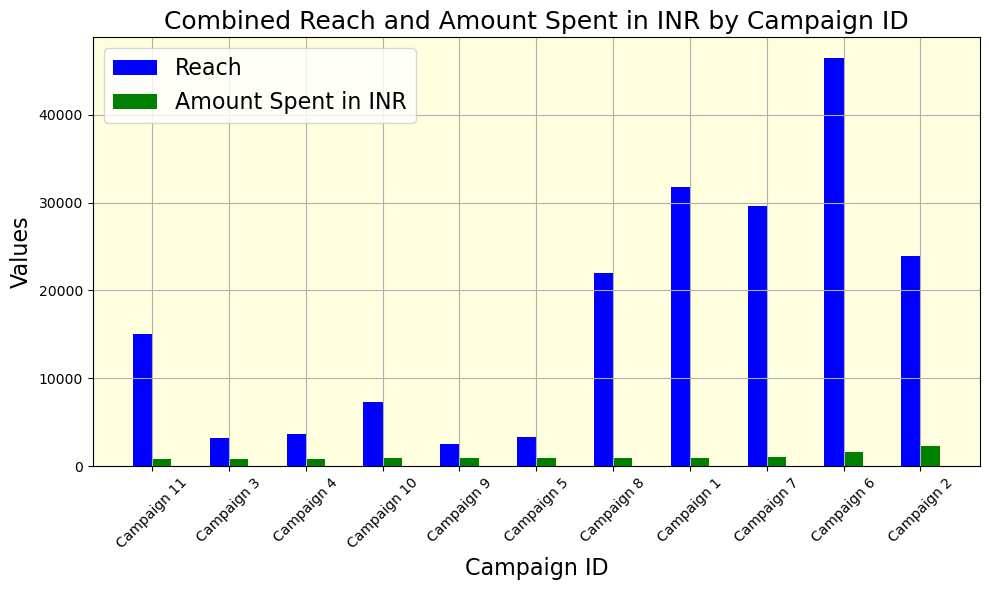

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightyellow')

bar_width = 0.25
index = np.arange(len(combined_reach_amountspend_df['campaign ID']))

# Plot Reach bars
bar1 = ax.bar(index, combined_reach_amountspend_df['Reach'], bar_width, label='Reach', color='blue')

# Plot Impressions bars
bar2 = ax.bar(index + bar_width, combined_reach_amountspend_df['Amount Spent in INR'], bar_width, label='Amount Spent in INR', color='green')

# Add labels, title, and legend
ax.set_xlabel('Campaign ID', fontsize='16')
ax.set_ylabel('Values', fontsize='16')
ax.set_title('Combined Reach and Amount Spent in INR by Campaign ID', fontsize='18')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_reach_impression_df['campaign ID'], rotation=45)
ax.legend(fontsize='16')
plt.grid(True)
plt.tight_layout()
plt.show()

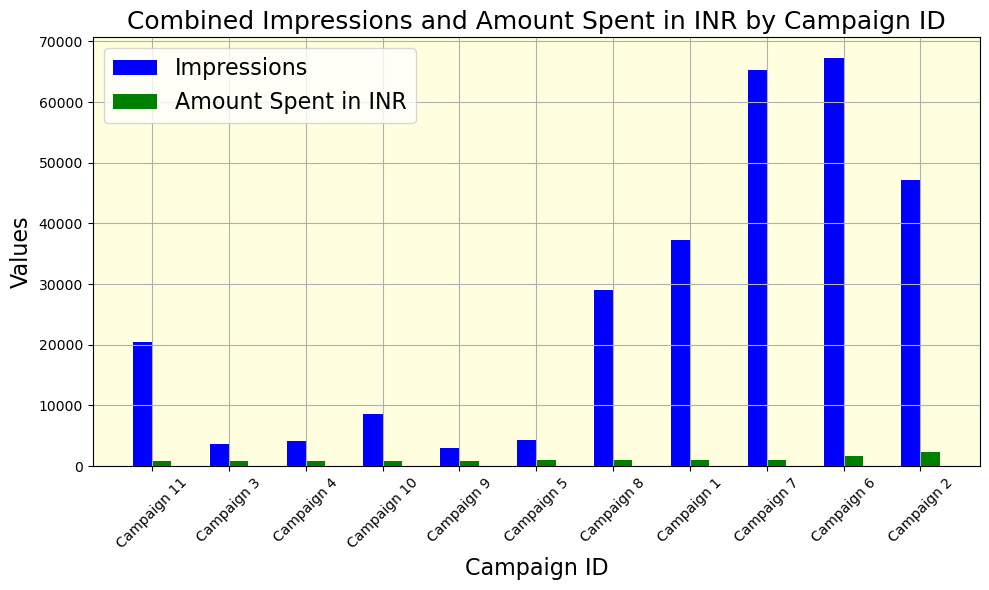

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightyellow')
bar_width = 0.25
index = np.arange(len(combined_impression_amountspend_df['campaign ID']))

# Plot Reach bars
bar1 = ax.bar(index, combined_impression_amountspend_df['Impressions'], bar_width, label='Impressions', color='blue')

# Plot Impressions bars
bar2 = ax.bar(index + bar_width, combined_impression_amountspend_df['Amount Spent in INR'], bar_width, label='Amount Spent in INR', color='green')

# Add labels, title, and legend
ax.set_xlabel('Campaign ID', fontsize='16')
ax.set_ylabel('Values', fontsize='16')
ax.set_title('Combined Impressions and Amount Spent in INR by Campaign ID', fontsize='18')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_reach_impression_df['campaign ID'], rotation=45)
ax.legend(fontsize='16')
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
# Group by 'Campaign ID' and sum the 'CTR' and 'CPR' columns
combined_ctr_cpr_df = df.groupby('campaign ID').agg({'Click-Through Rate (CTR)': 'sum', 'Cost per Result (CPR)': 'sum'}).sort_values(["Cost per Result (CPR)"]).reset_index()
combined_ctr_cpr_df

,campaign ID,Click-Through Rate (CTR),Cost per Result (CPR)
0,Campaign 6,8.607125,2.11
1,Campaign 8,29.556387,2.69
2,Campaign 2,17.787891,3.10
3,Campaign 7,6.693485,5.99
4,Campaign 5,10.091072,11.91
5,Campaign 1,10.921752,20.52
6,Campaign 4,16.540385,23.79
7,Campaign 9,7.943310,28.05
8,Campaign 11,26.801233,28.71
9,Campaign 10,10.875937,55.95


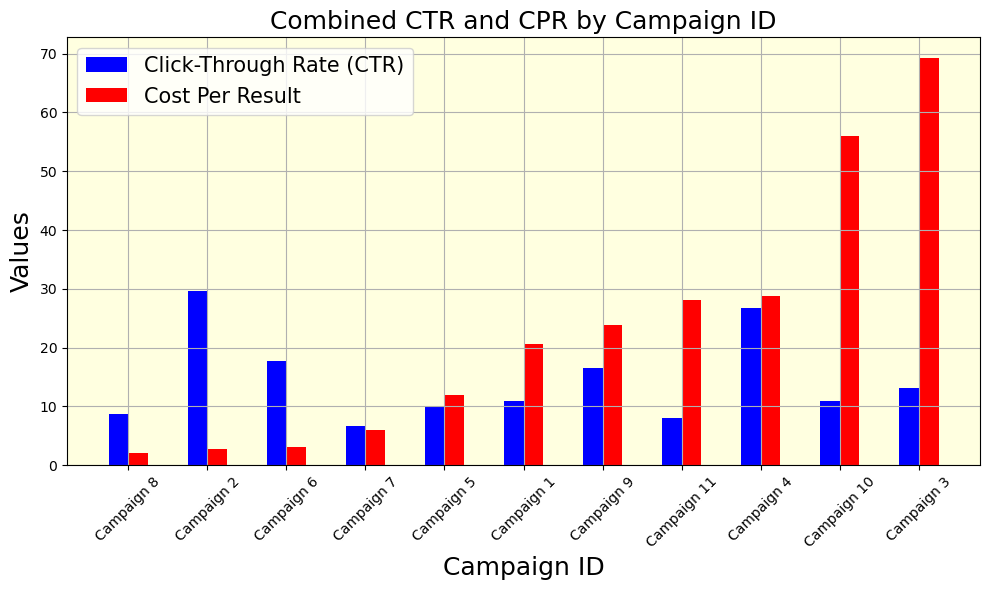

In [95]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightyellow')

bar_width = 0.25
index = np.arange(len(combined_ctr_cpr_df['campaign ID']))

# Plot Reach bars
bar1 = ax.bar(index, combined_ctr_cpr_df['Click-Through Rate (CTR)'], bar_width, label='Click-Through Rate (CTR)', color='blue')

# Plot Impressions bars
bar2 = ax.bar(index + bar_width, combined_ctr_cpr_df['Cost per Result (CPR)'], bar_width, label='Cost Per Result', color='red')

# Add labels, title, and legend
ax.set_xlabel('Campaign ID', fontsize='18')
ax.set_ylabel('Values', fontsize='18')
ax.set_title('Combined CTR and CPR by Campaign ID', fontsize='18')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_cpc_cpr_df['campaign ID'], rotation=45)
ax.legend(fontsize='15')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Group by 'Campaign ID' and sum the 'CPC' and 'CPR' columns
combined_cpc_cpr_df = df.groupby('campaign ID').agg({'Cost Per Click (CPC)': 'sum', 'Cost per Result (CPR)': 'sum'}).sort_values(["Cost Per Click (CPC)"]).reset_index()
combined_cpc_cpr_df

,campaign ID,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 8,1.042724,2.69
1,Campaign 2,1.242309,3.10
2,Campaign 6,1.348861,2.11
3,Campaign 7,2.166728,5.99
4,Campaign 5,3.851024,11.91
5,Campaign 1,7.342110,20.52
6,Campaign 9,10.754258,28.05
7,Campaign 11,14.438605,28.71
8,Campaign 4,16.512725,23.79
9,Campaign 10,22.355507,55.95


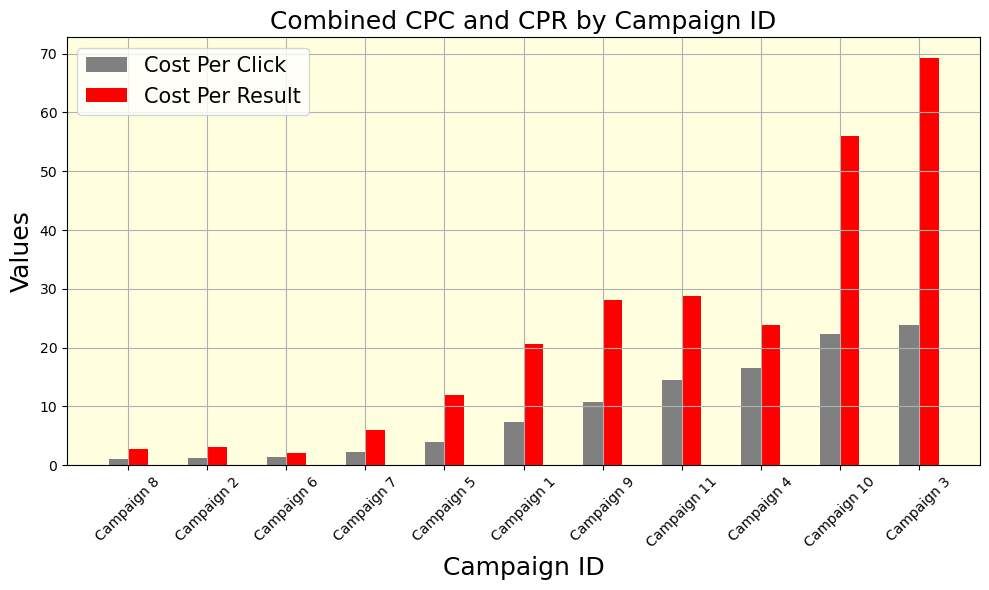

In [78]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightyellow')

bar_width = 0.25
index = np.arange(len(combined_cpc_cpr_df['campaign ID']))

# Plot Reach bars
bar1 = ax.bar(index, combined_cpc_cpr_df['Cost Per Click (CPC)'], bar_width, label='Cost Per Click', color='grey')

# Plot Impressions bars
bar2 = ax.bar(index + bar_width, combined_cpc_cpr_df['Cost per Result (CPR)'], bar_width, label='Cost Per Result', color='red')

# Add labels, title, and legend
ax.set_xlabel('Campaign ID', fontsize='18')
ax.set_ylabel('Values', fontsize='18')
ax.set_title('Combined CPC and CPR by Campaign ID', fontsize='18')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_cpc_cpr_df['campaign ID'], rotation=45)
ax.legend(fontsize='15')
plt.grid(True)
plt.tight_layout()
plt.show()